# Corner detection

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
chess = cv2.imread('data/chess.jpg')
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)

# lets read real chess image

real_chess = cv2.imread('data/real-chess.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)


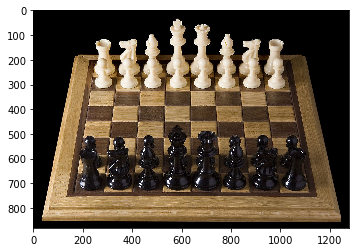

In [3]:
plt.imshow(real_chess)

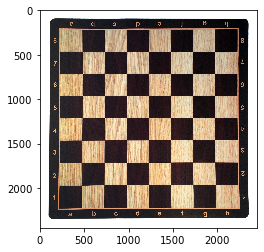

In [4]:
plt.imshow(chess)

In [5]:
gray_chess = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)


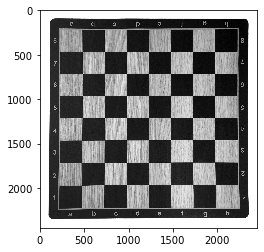

In [6]:
plt.imshow(gray_chess, cmap = 'gray')

In [7]:
gray = np.float32(gray_chess)

In [8]:
dst = cv2.cornerHarris(src = gray, blockSize = 2,ksize =3,k = 0.04 )

In [9]:
dst = cv2.dilate(dst,None)

In [10]:
chess[dst > 0.01 * dst.max()] = [255,0,0] #RGB

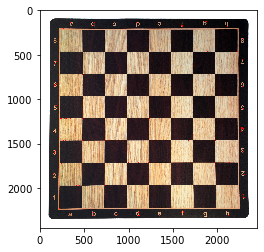

In [11]:
plt.imshow(chess)

In [12]:
gray_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [13]:
gray = np.float32(gray_chess)

In [14]:
dst = cv2.cornerHarris(src = gray, blockSize = 2,ksize =3,k = 0.04 )

In [15]:
dst = cv2.dilate(dst,None)

In [17]:
real_chess[dst > 0.01 * dst.max()] = [255,0,0] #RGB

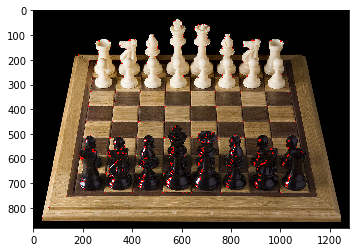

In [19]:
plt.imshow(real_chess)

In [26]:
capture = cv2.VideoCapture(0)

while True:
    ret,frame = capture.read()
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray_frame)
    dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3 , k = 0.04)
    dst = cv2.dilate(dst,None)
    frame[dst > 0.01 * dst.max()] = [0,0,255]
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) & 0xFF == 27:
        break

capture.release()
cv2.destroyAllWindows()